In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 16

In [26]:
v_max = 1.0 #[km/h]
rho_max = 10. #[cars/unit length]
L = 4. #road length [km]
nx = 81 #number of discrete points in space along road (uniform spacing)
dx = L / (nx - 1) #spatial step
nt = 30 #number of time steps
dt = 0.05 #time step
rho_light = 10.0 #max density, density at stop light
light_position = 2.0 #position of light on road [km]

In [38]:
def velocity(rho, rho_max, v_max):
    vel = v_max*(1 - rho / rho_max)
    return vel

def ic(pos, light_pos, light_density):
    if (pos < light_pos):
        density = light_density*pos/light_pos
    else:
        density = 0.0
    return density

def get_flux(rho, rho_max, v_max):
    floox = rho*v_max*(1.0 - rho / rho_max)
    return floox

Text(0.5, 1.0, 'Initial State')

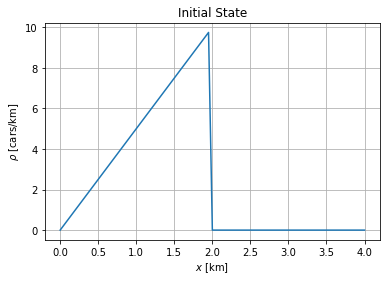

In [49]:
plt.grid()
plt.plot(x, states[0,:])
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$\rho$ [cars/km]')
plt.title("Initial State")

In [132]:
def ftbs(f, *args):
    # ==== INITIAL STATE =====
    x = np.arange(0,L + dx,dx)
    states0 = np.zeros(nx)
    for i in range(nx):
        states0[i] = ic(i*dx, light_position, rho_light)
    states = [ states0.copy() ]
    
    # ====
    
    for j in range(0,nt):
        state_vec = states[j]
        new_state = state_vec.copy()
        for i in range(1,nx):
            rho_dot = ((f(state_vec[i-1], *args) - f(state_vec[i], *args))) / dx
            new_state[i] = state_vec[i] + dt * rho_dot
        states.append(new_state)
    
    return states

In [139]:
#import pywidgets

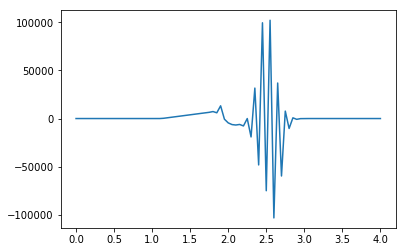

In [138]:
state_hist = ftbs(get_flux, rho_max, v_max)

plt.plot(x, state_hist[25])

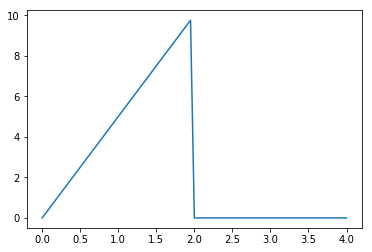

In [142]:
xL = 2.0
rhoL = 10.0
rho0 = np.zeros(len(x))
for i in range(len(x)):
    rho0[i] = ic(x[i], xL, rhoL)
plt.plot(x, rho0)


In [143]:
def plot(n, x, rho_hist):
    plt.figure()
    plt.title('Time Step: {}'.format(n))
    plt.xlabel('Road')
    plt.ylabel('Traffic Density')
    plt.plot(x, rho_hist[n])
    plt.xlim(x[0], x[-1])
    plt.ylim(-0.5, 11.0)
    plt.show()

In [145]:
#for i in range(nt):
    #plot(i, x, state_hist)

In [148]:
import ipywidgets

def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                    description = 'Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider,
                              x=ipywidgets.fixed(x),
                              rho_hist = ipywidgets.fixed(rho_hist))
    return w

In [149]:
interactive_plot(x, state_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=30), Output()), _dom_classes=('widget-in…